<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
!pip install scikeras

#Git

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 561, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 561 (delta 122), reused 11 (delta 11), pack-reused 373 (from 2)
Receiving objects: 100% (561/561), 58.03 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (279/279), done.


#Data Reading

In [3]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


#Preprocessing

###Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [5]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_encoded = df_encoded.drop('Patient_ID', axis=1)
df_encoded = df_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [6]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


###SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_numerical = X_train_res[numerical_features]
X_test_numerical = X_test[numerical_features]

# Select the categorical features for linear models (all columns not in numerical_features)
categorical_features = X_train_res.columns.difference(numerical_features)
X_train_categorical = X_train_res[categorical_features]
X_test_categorical = X_test[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_res.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled.shape)
print("Testing data shape after selective scaling:", X_test_scaled.shape)

Training data shape after selective scaling: (1332, 27)
Testing data shape after selective scaling: (283, 27)


#GLM

##With ALSFRS_R

In [10]:
# Part 1 — Fit ordinal logistic GLM on (X_train_scaled, y_train_res)

import numpy as np
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# --- Ensure y is coded 0..3 (if it's 1..4, remap)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1  # -> {0,1,2,3}

# --- Ensure X is a numeric DataFrame (no constant; OrderedModel handles thresholds)
if isinstance(X_train_scaled, np.ndarray):
    X_tr = pd.DataFrame(X_train_scaled)
else:
    X_tr = X_train_scaled.copy()
X_tr = X_tr.astype(float)

# --- Fit proportional-odds (logit link)
mod_glm = OrderedModel(y_tr.values, X_tr, distr="logit")
res_glm = mod_glm.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM (train) ===")
print(res_glm.summary())


=== Ordinal Logistic GLM (train) ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -931.02
Model:                   OrderedModel   AIC:                             1922.
Method:            Maximum Likelihood   BIC:                             2078.
Date:                Thu, 04 Sep 2025                                         
Time:                        09:32:39                                         
No. Observations:                1332                                         
Df Residuals:                    1302                                         
Df Model:                          27                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset                         0.1115      0

In [11]:
# Part 2 — Evaluate GLM on test data

from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# --- Ensure y_test is coded 0..3
y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1   # map to {0,1,2,3}

# --- Ensure X_test_scaled is DataFrame with correct dtype
if isinstance(X_test_scaled, np.ndarray):
    X_te = pd.DataFrame(X_test_scaled, columns=res_glm.model.exog_names)
else:
    X_te = X_test_scaled.copy()
X_te = X_te.astype(float)

# --- Predict class probabilities
probs = res_glm.predict(X_te)          # shape = (n_test, 4)
yhat  = np.asarray(probs).argmax(axis=1)

# --- Metrics
acc  = accuracy_score(y_te, yhat)
omae = mean_absolute_error(y_te, yhat)
cm   = confusion_matrix(y_te, yhat, labels=[0,1,2,3])

print("=== Test set evaluation ===")
print("Accuracy:", round(acc, 3))
print("Ordinal MAE:", round(omae, 3))
print("\nConfusion matrix (rows=true, cols=pred):\n", cm)


=== Test set evaluation ===
Accuracy: 0.661
Ordinal MAE: 0.367

Confusion matrix (rows=true, cols=pred):
 [[31 16  1  0]
 [15 23 15  0]
 [ 7 20 49  7]
 [ 0  0 15 84]]


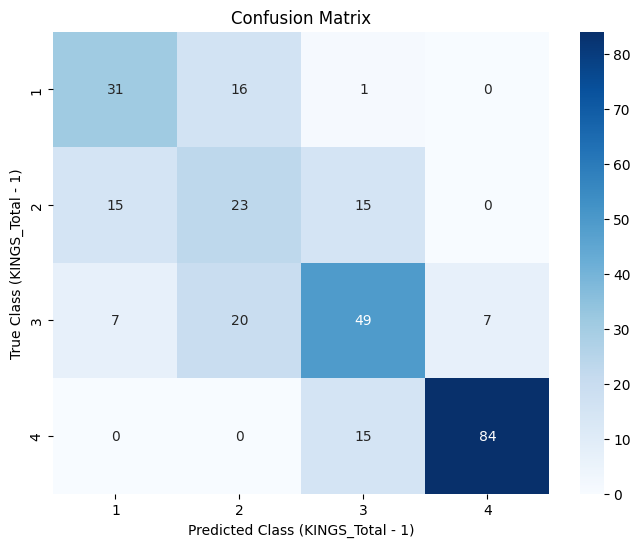

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels for the confusion matrix
class_labels = ['1', '2', '3', '4']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Class (KINGS_Total - 1)')
plt.ylabel('True Class (KINGS_Total - 1)')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##Without ALSFRS_R

In [13]:
# Cell 1 — Remove ALSFRS_R-related columns and rebuild train/test matrices

import numpy as np
import pandas as pd

# 1) Ensure we have column names for X; if not, try to recover them from the previous fitted model
if hasattr(X_train_scaled, "columns"):
    Xtr_full = X_train_scaled.copy()
    Xte_full = X_test_scaled.copy()
    colnames = list(Xtr_full.columns)
elif "res_glm" in globals():
    # Use the previously fitted model's exog names
    colnames = list(getattr(res_glm.model, "exog_names", []))
    if not colnames:
        raise ValueError("Could not recover column names from the previous model.")
    Xtr_full = pd.DataFrame(X_train_scaled, columns=colnames)
    Xte_full = pd.DataFrame(X_test_scaled,  columns=colnames)
else:
    raise ValueError("X_train_scaled has no column names. Please provide the feature names to proceed.")

# 2) Identify ALSFRS_R columns (case-insensitive, catches one-hot names too)
drop_cols = [c for c in colnames if "ALSFRS" in c.upper()]
if not drop_cols:
    print("No columns matching 'ALSFRS' were found — proceeding without dropping.")
else:
    print("Dropping columns:", drop_cols)

# 3) Build reduced design matrices
X_train_no_alsfrs = Xtr_full.drop(columns=drop_cols, errors="ignore").astype(float)
X_test_no_alsfrs  = Xte_full.drop(columns=drop_cols, errors="ignore").astype(float)

# 4) Prepare y (ensure 0..3 coding)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1

y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1

print("Shapes — X_train_no_alsfrs:", X_train_no_alsfrs.shape, "| X_test_no_alsfrs:", X_test_no_alsfrs.shape)


Dropping columns: ['ALSFRS_R']
Shapes — X_train_no_alsfrs: (1332, 26) | X_test_no_alsfrs: (283, 26)


In [14]:
# Cell 2 — Fit ordinal logistic GLM (no ALSFRS_R) and evaluate

from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np

# 1) Fit model on the reduced training set
mod_glm_no_alsfrs = OrderedModel(y_tr.values, X_train_no_alsfrs, distr="logit")
res_glm_no_alsfrs = mod_glm_no_alsfrs.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===")
print(res_glm_no_alsfrs.summary())

# 2) Evaluate on test
probs_no_alsfrs = res_glm_no_alsfrs.predict(X_test_no_alsfrs)   # (n_test, 4)
yhat_no_alsfrs  = np.asarray(probs_no_alsfrs).argmax(axis=1)

acc_no_alsfrs  = accuracy_score(y_te, yhat_no_alsfrs)
omae_no_alsfrs = mean_absolute_error(y_te, yhat_no_alsfrs)
cm_no_alsfrs   = confusion_matrix(y_te, yhat_no_alsfrs, labels=[0,1,2,3])

print("\n=== Test set (NO ALSFRS_R) ===")
print("Accuracy   :", round(acc_no_alsfrs, 3))
print("Ordinal MAE:", round(omae_no_alsfrs, 3))
print("Confusion matrix (rows=true, cols=pred):\n", cm_no_alsfrs)


=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -1138.0
Model:                   OrderedModel   AIC:                             2334.
Method:            Maximum Likelihood   BIC:                             2485.
Date:                Thu, 04 Sep 2025                                         
Time:                        09:32:45                                         
No. Observations:                1332                                         
Df Residuals:                    1303                                         
Df Model:                          26                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset             

#Temp

In [15]:
import numpy as np
import pandas as pd

def simulate_posterior(res_glm, n_draws=5000):
    # 1. Get point estimates and covariance matrix
    beta_hat = res_glm.params
    cov      = res_glm.cov_params()

    # 2. Drop cutpoints (keep only predictors)
    beta_hat = beta_hat[res_glm.model.exog_names]
    cov      = cov.loc[res_glm.model.exog_names, res_glm.model.exog_names]

    # 3. Simulate posterior draws
    draws = np.random.multivariate_normal(mean=beta_hat, cov=cov, size=n_draws)
    draws_df = pd.DataFrame(draws, columns=beta_hat.index)

    # 4. Summarize: mean, 95% CI for log-odds and odds ratios
    summary = []
    for col in draws_df.columns:
        vals = draws_df[col]
        or_vals = np.exp(vals)
        summary.append({
            "predictor": col,
            "logodds_mean": vals.mean(),
            "logodds_2.5%": np.percentile(vals, 2.5),
            "logodds_97.5%": np.percentile(vals, 97.5),
            "OR_mean": or_vals.mean(),
            "OR_2.5%": np.percentile(or_vals, 2.5),
            "OR_97.5%": np.percentile(or_vals, 97.5),
        })
    return pd.DataFrame(summary).set_index("predictor")

# Run for both models
post_glm        = simulate_posterior(res_glm)
post_glm_noa    = simulate_posterior(res_glm_no_alsfrs)

# Display
print("=== With ALSFRS_R ===")
display(post_glm.sort_values("OR_mean", ascending=False))

print("=== Without ALSFRS_R ===")
display(post_glm_noa.sort_values("OR_mean", ascending=False))


=== With ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,1.813613,1.352585,2.284128,6.306361,3.867411,9.817124
Therapy_Edaravone,1.589061,0.822805,2.360435,5.298141,2.276879,10.595563
Clinical_onset_type_respiratorio,1.189382,-0.585940,2.950748,4.922774,0.556583,19.120245
2/3,1.348117,1.242359,1.451764,3.855857,3.463775,4.270643
Therapy_nessuna terapia,1.111588,0.436418,1.791912,3.226370,1.547155,6.000918
MRC_Upper_Limb,0.969177,0.734915,1.195155,2.654366,2.085306,3.304071
Therapy_Riluzolo e Edaravone,0.818180,-0.156789,1.771662,2.548652,0.854885,5.880622
1/2,0.926078,0.825948,1.025716,2.527794,2.284045,2.789093
Therapy_Riluzolo,0.595558,-0.029164,1.215548,1.909978,0.971258,3.372142


=== Without ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,3.546182,3.121857,3.968664,35.489452,22.688464,52.913790
Clinical_onset_type_multiplo,1.535463,-0.322820,3.441406,7.390468,0.724104,31.230839
Clinical_onset_type_respiratorio,1.634817,0.003047,3.262086,7.303739,1.003052,26.103949
Therapy_Edaravone,1.779313,1.062145,2.502777,6.344815,2.892570,12.216371
PEG,1.503063,0.323756,2.700495,5.400612,1.382309,14.887099
Therapy_Riluzolo e Edaravone,1.499972,0.600583,2.428353,4.971166,1.823182,11.340191
2/3,1.006036,0.901517,1.110171,2.738630,2.463338,3.034879
ALSAQ_5,0.932383,0.745425,1.113384,2.551643,2.107338,3.044644
Therapy_nessuna terapia,0.783231,0.140011,1.416506,2.309474,1.150286,4.122690


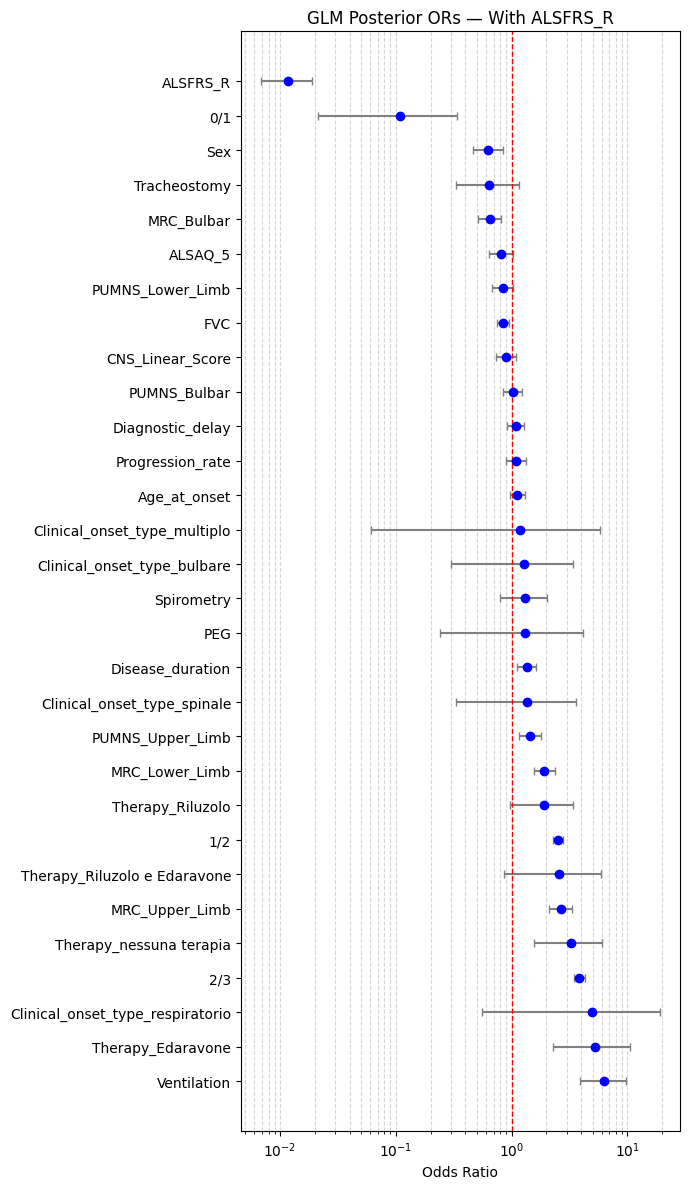

In [16]:
import matplotlib.pyplot as plt

def plot_forest(post_df, title="Posterior Odds Ratios (95% CI)", figsize=(7, None), sort_by="OR_mean"):
    # Sort predictors (optional)
    post_df = post_df.sort_values(by=sort_by)

    # Plot setup
    n = len(post_df)
    figsize = (figsize[0], n * 0.4 if figsize[1] is None else figsize[1])
    fig, ax = plt.subplots(figsize=figsize)

    # Extract values
    or_means = post_df["OR_mean"]
    or_lows  = post_df["OR_2.5%"]
    or_highs = post_df["OR_97.5%"]
    labels   = post_df.index.tolist()
    y_pos    = range(len(post_df))

    # Error bars (horizontal)
    ax.errorbar(
        x=or_means, y=y_pos,
        xerr=[or_means - or_lows, or_highs - or_means],
        fmt='o', color='blue', ecolor='gray', capsize=3
    )

    # Reference line at OR = 1 (no effect)
    ax.axvline(x=1.0, color='red', linestyle='--', linewidth=1)

    # Axes formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Odds Ratio")
    ax.set_title(title)
    ax.invert_yaxis()  # Highest OR at top
    ax.set_xscale('log')  # Log scale for ORs

    plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_forest(post_glm, title="GLM Posterior ORs — With ALSFRS_R")


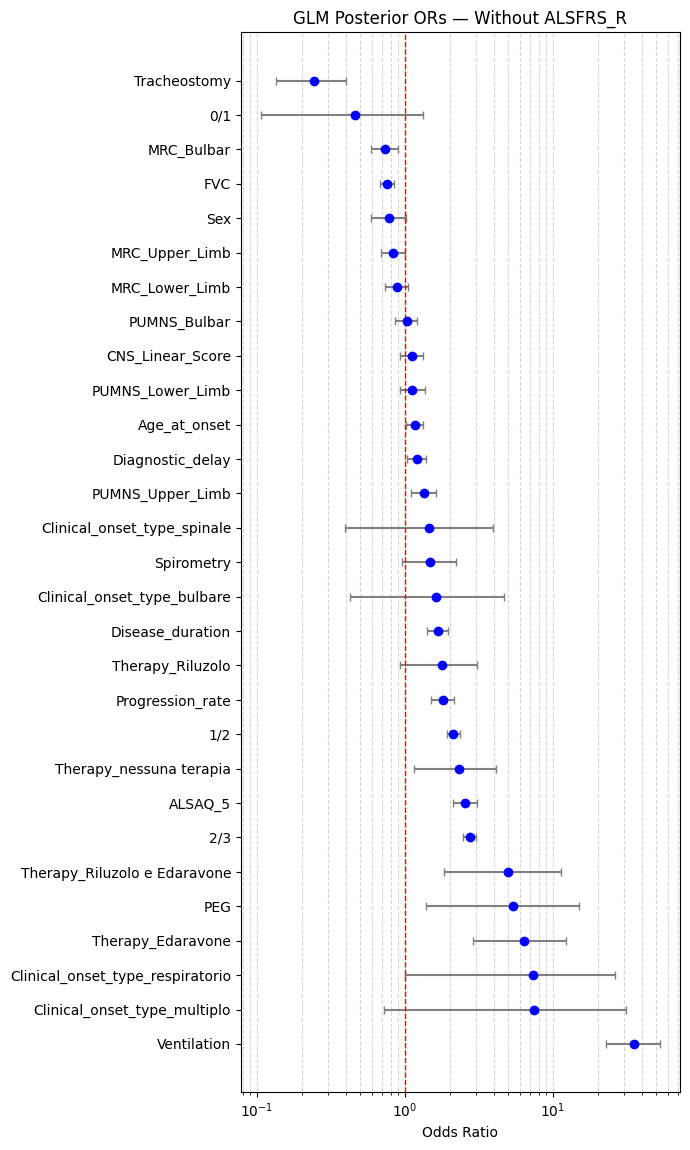

In [17]:
plot_forest(post_glm_noa, title="GLM Posterior ORs — Without ALSFRS_R")


#Temp

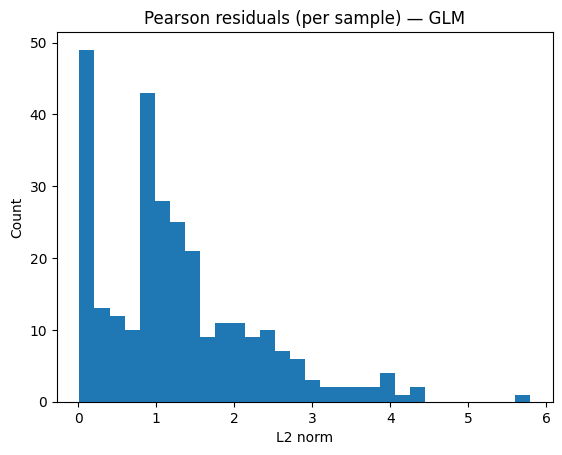

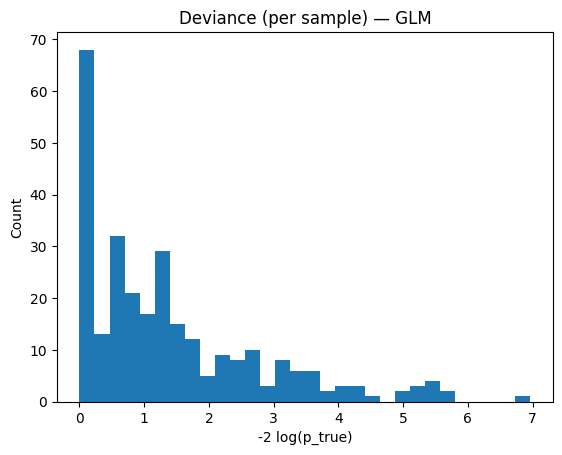

In [28]:
# Residuals for the GLM with all features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Predicted probabilities (n_samples, n_classes)
probs = np.asarray(res_glm.predict(X_te))
y_true = pd.Series(y_te).astype(int).values
n_classes = probs.shape[1]

# One-hot observed
obs = np.eye(n_classes)[y_true]

# Pearson residuals (per class), then L2 per sample
eps = 1e-12
den = np.sqrt(np.clip(probs * (1.0 - probs), eps, None))
pearson = (obs - probs) / den
pearson_l2 = np.linalg.norm(pearson, axis=1)

# Deviance per sample (for one-hot, reduces to -2 log p_true)
p_true = np.take_along_axis(np.clip(probs, eps, 1.0), y_true[:, None], axis=1).ravel()
deviance = -2.0 * np.log(p_true)

# Plots (one chart per figure, default colors)
plt.figure()
plt.hist(pearson_l2, bins=30)
plt.title("Pearson residuals (per sample) — GLM")
plt.xlabel("L2 norm")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(deviance, bins=30)
plt.title("Deviance (per sample) — GLM")
plt.xlabel("-2 log(p_true)")
plt.ylabel("Count")
plt.show()


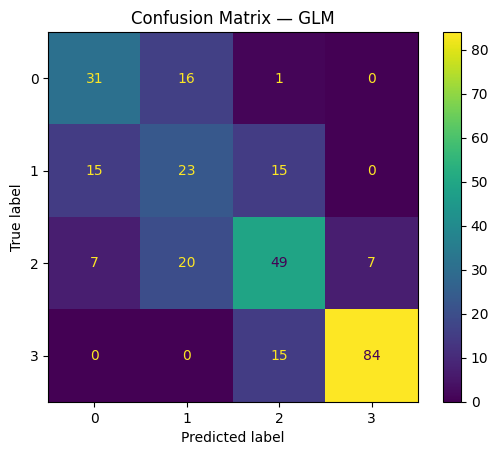

Quadratic Weighted Kappa (GLM): 0.8235


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

y_pred = probs.argmax(axis=1)
labels = np.sort(np.unique(y_true))

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix — GLM")
plt.show()

kappa_qw = cohen_kappa_score(y_true, y_pred, weights="quadratic")
print("Quadratic Weighted Kappa (GLM):", round(kappa_qw, 4))


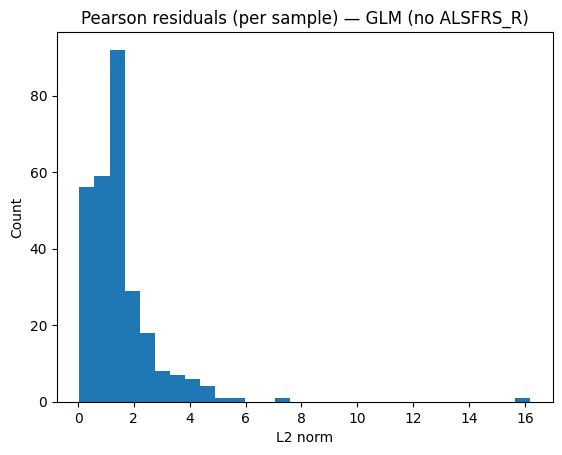

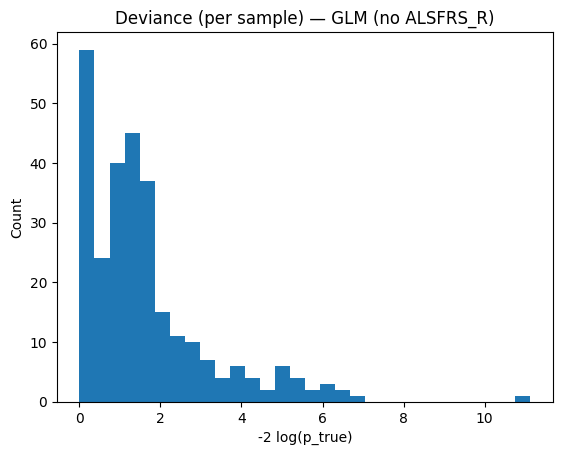

In [30]:
# Residuals for the GLM without ALSFRS_R
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

probs_no = np.asarray(res_glm_no_alsfrs.predict(X_test_no_alsfrs))
y_true = pd.Series(y_te).astype(int).values
n_classes_no = probs_no.shape[1]

obs_no = np.eye(n_classes_no)[y_true]

eps = 1e-12
den_no = np.sqrt(np.clip(probs_no * (1.0 - probs_no), eps, None))
pearson_no = (obs_no - probs_no) / den_no
pearson_l2_no = np.linalg.norm(pearson_no, axis=1)

p_true_no = np.take_along_axis(np.clip(probs_no, eps, 1.0), y_true[:, None], axis=1).ravel()
deviance_no = -2.0 * np.log(p_true_no)

plt.figure()
plt.hist(pearson_l2_no, bins=30)
plt.title("Pearson residuals (per sample) — GLM (no ALSFRS_R)")
plt.xlabel("L2 norm")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(deviance_no, bins=30)
plt.title("Deviance (per sample) — GLM (no ALSFRS_R)")
plt.xlabel("-2 log(p_true)")
plt.ylabel("Count")
plt.show()


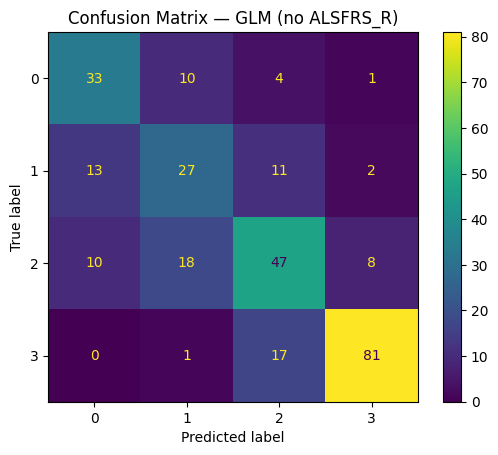

Quadratic Weighted Kappa (GLM, no ALSFRS_R): 0.7765


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

y_pred_no = probs_no.argmax(axis=1)
labels = np.sort(np.unique(y_true))

cm_no = confusion_matrix(y_true, y_pred_no, labels=labels)
disp_no = ConfusionMatrixDisplay(confusion_matrix=cm_no, display_labels=labels)
disp_no.plot(values_format="d")
plt.title("Confusion Matrix — GLM (no ALSFRS_R)")
plt.show()

kappa_qw_no = cohen_kappa_score(y_true, y_pred_no, weights="quadratic")
print("Quadratic Weighted Kappa (GLM, no ALSFRS_R):", round(kappa_qw_no, 4))


In [32]:
# Flag low-confidence predictions (e.g., max prob < 0.6)
thr = 0.60
uncertain_full = (probs.max(axis=1) < thr)
uncertain_no   = (probs_no.max(axis=1) < thr)

print("Uncertain rate — full GLM:", uncertain_full.mean())
print("Uncertain rate — GLM no ALSFRS_R:", uncertain_no.mean())


Uncertain rate — full GLM: 0.36395759717314485
Uncertain rate — GLM no ALSFRS_R: 0.607773851590106


#Temp

In [33]:
# Confidence intervals for coefficients (full model)
ci_full = res_glm.conf_int()
ci_full.columns = ["2.5%", "97.5%"]
print("\n=== Confidence Intervals (full GLM) ===")
print(ci_full)

# For model without ALSFRS_R
ci_no = res_glm_no_alsfrs.conf_int()
ci_no.columns = ["2.5%", "97.5%"]
print("\n=== Confidence Intervals (GLM no ALSFRS_R) ===")
print(ci_no)



=== Confidence Intervals (full GLM) ===
                                      2.5%     97.5%
Age_at_onset                     -0.037228  0.260291
Diagnostic_delay                 -0.088776  0.252305
MRC_Upper_Limb                    0.736258  1.199855
MRC_Lower_Limb                    0.438147  0.848909
MRC_Bulbar                       -0.664357 -0.200895
PUMNS_Upper_Limb                  0.155273  0.582245
PUMNS_Lower_Limb                 -0.387835  0.033933
PUMNS_Bulbar                     -0.162290  0.205585
CNS_Linear_Score                 -0.307585  0.078787
Disease_duration                  0.108900  0.486801
Progression_rate                 -0.101641  0.279409
ALSFRS_R                         -4.999288 -3.981236
ALSAQ_5                          -0.450968  0.029876
Clinical_onset_type_bulbare      -1.205315  1.301125
Clinical_onset_type_multiplo     -2.818972  1.791399
Clinical_onset_type_respiratorio -0.541581  2.898811
Clinical_onset_type_spinale      -1.102771  1.333470
FVC  

In [34]:
# Extract coefficients, standard errors, z-values, p-values
params_full = res_glm.params
se_full     = res_glm.bse
pvals_full  = res_glm.pvalues

coef_table_full = pd.DataFrame({
    "coef": params_full,
    "std_err": se_full,
    "z": params_full / se_full,
    "p_value": pvals_full
})
print("\n=== Coefficient Table (full GLM) ===")
print(coef_table_full)



=== Coefficient Table (full GLM) ===
                                      coef   std_err          z        p_value
Age_at_onset                      0.111532  0.075899   1.469468   1.417060e-01
Diagnostic_delay                  0.081765  0.087012   0.939693   3.473748e-01
MRC_Upper_Limb                    0.968056  0.118267   8.185377   2.714530e-16
MRC_Lower_Limb                    0.643528  0.104788   6.141230   8.188495e-10
MRC_Bulbar                       -0.432626  0.118232  -3.659121   2.530817e-04
PUMNS_Upper_Limb                  0.368759  0.108923   3.385491   7.105112e-04
PUMNS_Lower_Limb                 -0.176951  0.107596  -1.644588   1.000548e-01
PUMNS_Bulbar                      0.021648  0.093847   0.230669   8.175717e-01
CNS_Linear_Score                 -0.114399  0.098566  -1.160632   2.457916e-01
Disease_duration                  0.297850  0.096405   3.089575   2.004429e-03
Progression_rate                  0.088884  0.097208   0.914365   3.605249e-01
ALSFRS_R      

In [35]:
odds_ratios_full = np.exp(params_full)
print("\n=== Odds Ratios (full GLM) ===")
print(odds_ratios_full)



=== Odds Ratios (full GLM) ===
Age_at_onset                        1.117989
Diagnostic_delay                    1.085200
MRC_Upper_Limb                      2.632822
MRC_Lower_Limb                      1.903184
MRC_Bulbar                          0.648803
PUMNS_Upper_Limb                    1.445939
PUMNS_Lower_Limb                    0.837821
PUMNS_Bulbar                        1.021884
CNS_Linear_Score                    0.891902
Disease_duration                    1.346960
Progression_rate                    1.092954
ALSFRS_R                            0.011218
ALSAQ_5                             0.810142
Clinical_onset_type_bulbare         1.049071
Clinical_onset_type_multiplo        0.598226
Clinical_onset_type_respiratorio    3.249871
Clinical_onset_type_spinale         1.122266
FVC                                 0.842854
PEG                                 1.022902
Sex                                 0.623716
Spirometry                          1.260517
Therapy_Edaravone      

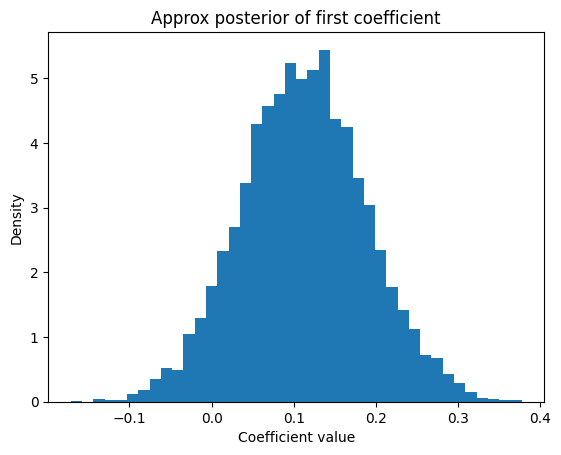

In [36]:
import numpy as np

# Sample from approximate posterior (MLE ~ Normal with covariance matrix)
n_samples = 5000
coef_samples = np.random.multivariate_normal(
    mean=res_glm.params,
    cov=res_glm.cov_params(),
    size=n_samples
)

# Example: posterior distribution of the first coefficient
import matplotlib.pyplot as plt
plt.hist(coef_samples[:,0], bins=40, density=True)
plt.title("Approx posterior of first coefficient")
plt.xlabel("Coefficient value")
plt.ylabel("Density")
plt.show()


#Temp

In [38]:
# Odds ratios for full model
odds_full = np.exp(res_glm.params)
print("\n=== Odds Ratios (full GLM) ===")
print(odds_full.sort_values(ascending=False))

# Odds ratios for model without ALSFRS_R
odds_no = np.exp(res_glm_no_alsfrs.params)
print("\n=== Odds Ratios (GLM no ALSFRS_R) ===")
print(odds_no.sort_values(ascending=False))



=== Odds Ratios (full GLM) ===
Ventilation                         6.141985
Therapy_Edaravone                   4.936589
2/3                                 3.851940
Clinical_onset_type_respiratorio    3.249871
Therapy_nessuna terapia             3.068386
MRC_Upper_Limb                      2.632822
1/2                                 2.527155
Therapy_Riluzolo e Edaravone        2.276051
MRC_Lower_Limb                      1.903184
Therapy_Riluzolo                    1.829740
PUMNS_Upper_Limb                    1.445939
Disease_duration                    1.346960
Spirometry                          1.260517
Clinical_onset_type_spinale         1.122266
Age_at_onset                        1.117989
Progression_rate                    1.092954
Diagnostic_delay                    1.085200
Clinical_onset_type_bulbare         1.049071
PEG                                 1.022902
PUMNS_Bulbar                        1.021884
CNS_Linear_Score                    0.891902
FVC                    

In [39]:
coef_table = pd.DataFrame({
    "coef": res_glm.params,
    "odds_ratio": np.exp(res_glm.params),
    "std_err": res_glm.bse,
    "z_value": res_glm.params / res_glm.bse,
    "p_value": res_glm.pvalues
})
coef_table["importance_rank"] = coef_table["z_value"].abs()
coef_table = coef_table.sort_values("importance_rank", ascending=False)

print("\n=== Ranked Features (full GLM) ===")
print(coef_table.head(15))



=== Ranked Features (full GLM) ===
                             coef  odds_ratio   std_err    z_value  \
2/3                      1.348577    3.851940  0.054263  24.852636   
1/2                      0.927094    2.527155  0.050086  18.510200   
ALSFRS_R                -4.490262    0.011218  0.259712 -17.289402   
MRC_Upper_Limb           0.968056    2.632822  0.118267   8.185377   
Ventilation              1.815148    6.141985  0.234992   7.724286   
MRC_Lower_Limb           0.643528    1.903184  0.104788   6.141230   
Therapy_Edaravone        1.596675    4.936589  0.393592   4.056670   
MRC_Bulbar              -0.432626    0.648803  0.118232  -3.659121   
0/1                     -2.456732    0.085715  0.702224  -3.498501   
PUMNS_Upper_Limb         0.368759    1.445939  0.108923   3.385491   
Therapy_nessuna terapia  1.121152    3.068386  0.341967   3.278540   
Sex                     -0.472060    0.623716  0.152349  -3.098544   
Disease_duration         0.297850    1.346960  0.09640

#Temp

In [62]:
import numpy as np
import pandas as pd

# Predicted probabilities from full GLM
P = np.asarray(probs)    # (n_samples, n_classes)
y_true = np.asarray(y_te)
y_pred = P.argmax(axis=1)

# Thresholds
MAXP_THR = 0.30   # flag if max prob < 60%
GAP_THR  = 0.0   # flag if top-2 probs too close
ENTR_THR = 1.0    # entropy cutoff (max = ln(4)=1.386)

# Compute metrics
maxp = P.max(axis=1)
top2 = np.partition(P, -2, axis=1)[:, -2]
gap = maxp - top2
entropy = -(P * np.log(P + 1e-12)).sum(axis=1)

# Apply flags
flag_low_maxp  = maxp < MAXP_THR
flag_small_gap = gap  < GAP_THR
flag_high_ent  = entropy > ENTR_THR

flag_uncertain = flag_low_maxp | flag_small_gap | flag_high_ent

print("Uncertain rate (probability-based, full GLM):", flag_uncertain.mean())

# Store in dataframe for inspection
uncertain_df = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred,
    "max_prob": maxp,
    "top2_gap": gap,
    "entropy": entropy,
    "flag_uncertain": flag_uncertain
})

uncertain_df.head(10)


Uncertain rate (probability-based, full GLM): 0.1413427561837456


,y_true,y_pred,max_prob,top2_gap,entropy,flag_uncertain
0,2,3,0.613193,0.239606,0.728638,False
1,2,2,0.554862,0.192537,0.954555,False
2,1,1,0.553637,0.296311,1.023391,True
3,0,0,0.946772,0.898014,0.223728,False
4,0,1,0.559225,0.340726,1.019623,True
5,2,2,0.681532,0.447087,0.862656,False
6,2,2,0.720676,0.518827,0.779957,False
7,0,1,0.528675,0.194848,0.991879,False
8,3,3,0.997512,0.995077,0.017675,False
9,0,0,0.533310,0.131959,0.887001,False


In [63]:
# Count where flag_uncertain is False
not_flagged_count = uncertain_df[uncertain_df['flag_uncertain'] == False].shape[0]

print("Number of samples where uncertain_df['flag_uncertain'] is False:", not_flagged_count)

Number of samples where uncertain_df['flag_uncertain'] is False: 243


In [64]:
# Count where flag_uncertain is False
not_flagged_count = uncertain_df[uncertain_df['flag_uncertain'] == True].shape[0]

print("Number of samples where uncertain_df['flag_uncertain'] is False:", not_flagged_count)

Number of samples where uncertain_df['flag_uncertain'] is False: 40


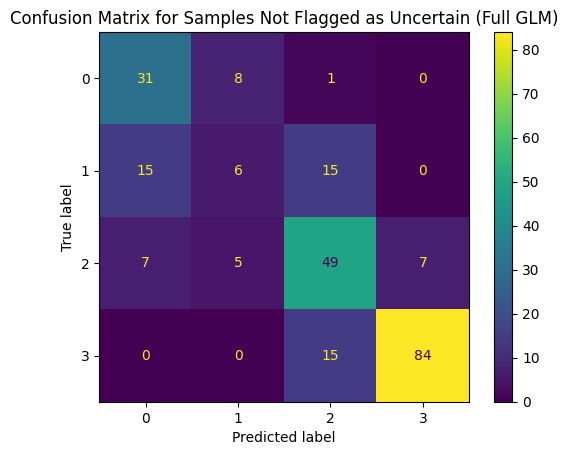

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for samples where flag_uncertain is False
not_flagged_df = uncertain_df[uncertain_df['flag_uncertain'] == False].copy()

# Get the true and predicted labels for these samples
y_true_not_flagged = not_flagged_df['y_true'].values
y_pred_not_flagged = not_flagged_df['y_pred'].values

# Define labels based on the unique values in the true labels (important for ConfusionMatrixDisplay)
labels = np.sort(np.unique(y_true)) # Assuming labels from previous plots are correct, otherwise use np.sort(np.unique(y_true_not_flagged))

# Calculate the confusion matrix
cm_not_flagged = confusion_matrix(y_true_not_flagged, y_pred_not_flagged, labels=labels)

# Plot the confusion matrix
disp_not_flagged = ConfusionMatrixDisplay(confusion_matrix=cm_not_flagged, display_labels=labels)
disp_not_flagged.plot(values_format="d")
plt.title("Confusion Matrix for Samples Not Flagged as Uncertain (Full GLM)")
plt.show()

# Optionally, calculate weighted kappa for this subset
# from sklearn.metrics import cohen_kappa_score
# kappa_qw_not_flagged = cohen_kappa_score(y_true_not_flagged, y_pred_not_flagged, weights="quadratic")
# print("Quadratic Weighted Kappa (Not Flagged Samples):", round(kappa_qw_not_flagged, 4))